**Welcome to your First graded assignment!**

## Exploring Olympics Data

This **Modern Olympic Games** can help you explore those questions!

About the Data

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016 from www.sports-reference.com in May 2018. (Pooled Data)

Following are the columns in the dataset:
-  ID - Unique number for each athlete
-  Name - Athlete's name
-  Sex - M or F
-  Age - Integer
-  Height - In centimeters
-  Weight - In kilograms
-  Team - Team name
-  NOC - National Olympic Committee 3-letter code
-  Games - Year and season
-  Year - Integer
-  Season - Summer or Winter
-  City - Host city
-  Sport - Sport
-  Event - Event
-  Medal - Gold, Silver, Bronze, or NA


**Requirements:**

Import data, Clean it and check necessary with steps.

The following Data Cleaning Steps need to be ensured:
- Make sure there is No Duplicate Data
- Check the Data Types > Height Column has a Issue
  > https://stackoverflow.com/a/67070094
- Transform Sex to Gender (Rename Col)
- Change the Members of Gender from M -> Male, F -> Female
- For Medal Column, Impute NaN / Null Values with "No Medal"

You have completed data cleaning at this point! Now you are required to answer the following questions based off on your dataset:

Objective Part:
- 5 Objective Questions
- 2 Challenge Questions

Subjective Part:
- 3 Subjective Questions (From your Brain - Make sure they are worthy to ask, Don't ask Repititve Question from Objective Section)

Good luck!

In [42]:
## Importing Required Libraries
import pandas as pd

## Reading the dataset
df = pd.read_csv("olympics-data.csv")

### DATA CLEANING GOES BELOW IT

Make sure there is No Duplicate Data

In [43]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [44]:
df.duplicated().sum()

0

In [45]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [46]:
#resetting the index after droping duplicates

In [47]:
df.reset_index(drop=True, inplace=True)

Check the Data Types > Height Column has a Issue

In [48]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [49]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Check the Data Types > Height Column has a Issue

In [50]:
# it has N values so it is treated as String so for that we do this

In [51]:
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df = df.reset_index(drop=True)

In [52]:
df['Height'].isna().sum()

58814

In [53]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

Transform Sex to Gender (Rename Col)

In [54]:
df.rename(columns={'Sex': 'Gender'}, inplace=True)

- Change the Members of Gender from M -> Male, F -> Female

In [55]:
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

Impute NaN/Null values in 'Medal' column with "No Medal"

In [56]:
df['Medal'].fillna("No Medal", inplace=True)

In [57]:
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
269726    False
269727    False
269728    False
269729    False
269730    False
Length: 269731, dtype: bool


In [58]:
df.isna().sum()

ID            0
Name          0
Gender        0
Age        9315
Height    58814
Weight    61527
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

In [59]:
df.reset_index(drop=True, inplace=True)

### DATA ANALYSIS IS HERE

#### OBJECTIVE QUESTIONS

##### Q1: Which gender has won most medals across all years?

In [60]:
exclude_noMedal = df[df['Medal'] != 'No Medal']

gender_with_desired_medals = exclude_noMedal.groupby('Gender')
count_gender_with_desired_medals=gender_with_desired_medals.agg({'ID': 'nunique'})

gender_with_Maxdesired_medals = count_gender_with_desired_medals['ID'].idxmax()

gender_with_Maxdesired_medals

'Male'

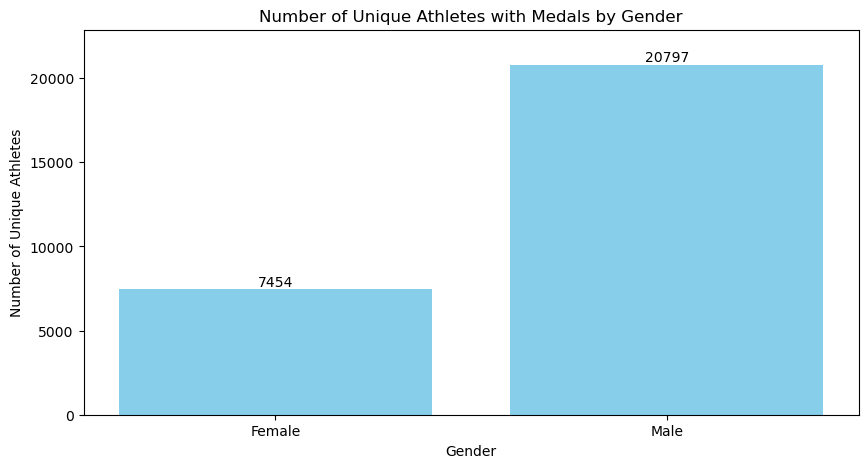

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(count_gender_with_desired_medals.index, count_gender_with_desired_medals['ID'],color='skyblue')

plt.xlabel('Gender')
plt.ylabel('Number of Unique Athletes')
plt.title('Number of Unique Athletes with Medals by Gender')


plt.ylim(top=count_gender_with_desired_medals['ID'].max() * 1.1, bottom=0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()


##### Q2: Which country has won the most gold medals? Put Top 5

In [62]:
check_goldmedal = df[df['Medal'].isin(['Gold'])]

country_mostgoldmedals = check_goldmedal['NOC'].value_counts()
df = df.reset_index(drop=True)

top5_goldmedalist=country_mostgoldmedals.head(5)

top5_goldmedalist

NOC
USA    2638
URS    1082
GER     745
GBR     677
ITA     575
Name: count, dtype: int64

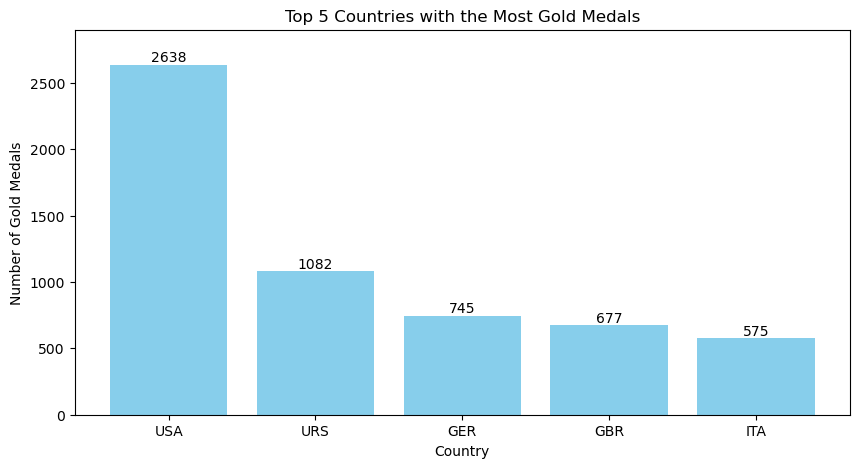

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(top5_goldmedalist.index, top5_goldmedalist.values, color='skyblue')

plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.title('Top 5 Countries with the Most Gold Medals')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.ylim(top=top5_goldmedalist.max() * 1.1, bottom=0)

plt.show()



##### Q3: Which Year hosted the Olympics with Most Number of Countries

In [64]:
groupingYear = df.groupby('Year')
Agg_groupedyear=groupingYear.agg({'NOC': 'nunique'})

groupedyear_withmaxcountries = Agg_groupedyear['NOC'].idxmax()
groupedyear_withmaxcountries

2016

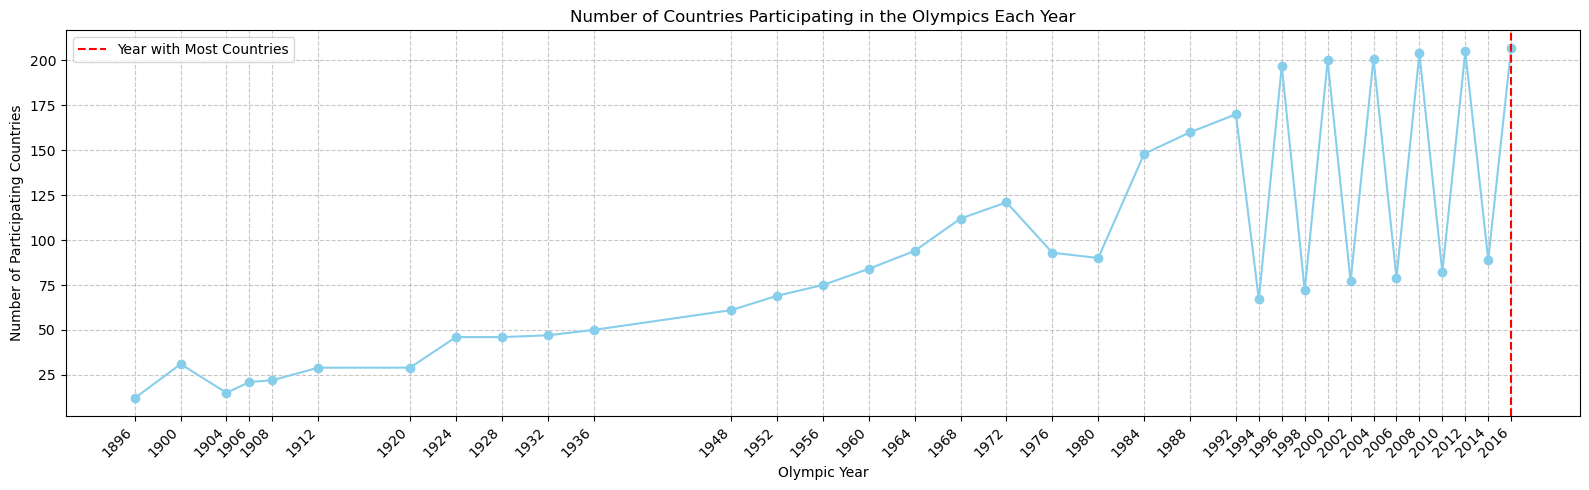

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5)) 
plt.plot(Agg_groupedyear.index, Agg_groupedyear['NOC'], marker='o', color='skyblue', linestyle='-')
plt.axvline(x=groupedyear_withmaxcountries, color='red', linestyle='--', label='Year with Most Countries')  

plt.xlabel('Olympic Year')
plt.ylabel('Number of Participating Countries')
plt.title('Number of Countries Participating in the Olympics Each Year')

plt.xticks(Agg_groupedyear.index, rotation=45, ha='right')

plt.legend()

plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  


plt.tight_layout()
plt.show()


##### Q4: Which Sport had Lowest Total Medals in 2014 Olympics? Display only 3

In [66]:
checkyear_2014 = df[(df['Year'] == 2014) & (df['Medal'] != 'No Medal')]

count_sport_2014 = checkyear_2014['Sport'].value_counts()
df = df.reset_index(drop=True)

last3sports = count_sport_2014.sort_values()
last3sports=last3sports.head(3)
last3sports

Sport
Skeleton            6
Nordic Combined    18
Ski Jumping        21
Name: count, dtype: int64

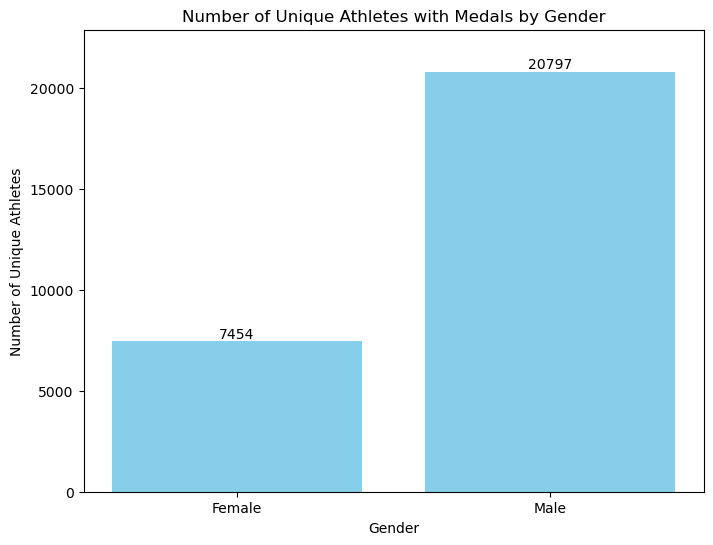

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = plt.bar(count_gender_with_desired_medals.index, count_gender_with_desired_medals['ID'],color='skyblue')

plt.xlabel('Gender')
plt.ylabel('Number of Unique Athletes')
plt.title('Number of Unique Athletes with Medals by Gender')

plt.ylim(top=count_gender_with_desired_medals['ID'].max() * 1.1, bottom=0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()


##### Q5: Which Country has the tallest athletes in Latest Olympics? Display Top 5

In [68]:
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

latest_olympicyear = df.query('Year == Year.max()')

mean_height_eachcountry = latest_olympicyear.groupby('NOC')['Height'].mean()

sort_meanheights_maxtomin = mean_height_eachcountry.sort_values(ascending=False)

top5_tallest_athletes=sort_meanheights_maxtomin.head(5)

top5_tallest_athletes=top5_tallest_athletes.reset_index()

top5_tallest_athletes

,NOC,Height
0,CRO,185.956989
1,SYR,185.333333
2,ISV,185.000000
3,QAT,184.142857
4,LTU,184.137500


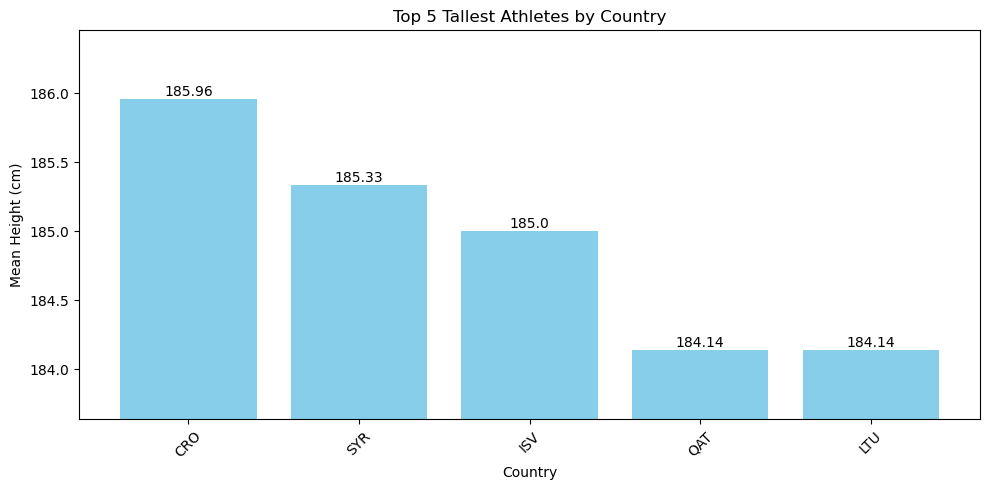

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(top5_tallest_athletes['NOC'], top5_tallest_athletes['Height'], color='skyblue')

plt.title('Top 5 Tallest Athletes by Country')
plt.xlabel('Country')
plt.ylabel('Mean Height (cm)')
plt.xticks(rotation=45)  

plt.ylim(top=top5_tallest_athletes['Height'].max() + 0.5, bottom=top5_tallest_athletes['Height'].min() - 0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()



#### SUBJECTIVE QUESTIONS (YOUR TURN)

how many gold medals have won by Pakistan in hockey? 

In [70]:
only_silverMedalandPakCountrySportHockey =  df.query("NOC == 'PAK' & Medal == 'Gold' & Sport == 'Hockey'")

silvermedalsbypakinHockey = only_silverMedalandPakCountrySportHockey['Medal'].count()
silvermedalsbypakinHockey

42

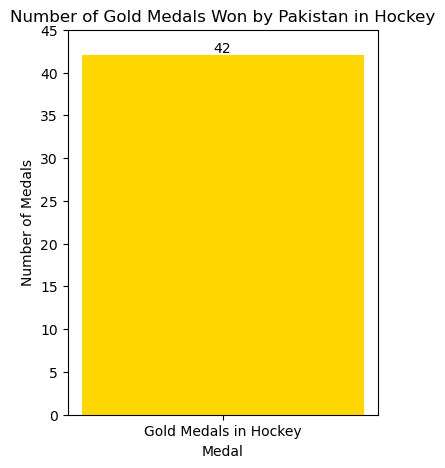

In [71]:
import matplotlib.pyplot as plt

only_gold_medals_pakistan_hockey = df.query("NOC == 'PAK' & Medal == 'Gold' & Sport == 'Hockey'")


num_gold_medals_pakistan_hockey = only_gold_medals_pakistan_hockey['Medal'].count()

plt.figure(figsize=(4, 5))
plt.bar(["Gold Medals in Hockey"], [num_gold_medals_pakistan_hockey], color='gold')

plt.text(0, num_gold_medals_pakistan_hockey, str(num_gold_medals_pakistan_hockey), ha='center', va='bottom')


plt.xlabel('Medal')
plt.ylabel('Number of Medals')
plt.title('Number of Gold Medals Won by Pakistan in Hockey')

plt.ylim(top=num_gold_medals_pakistan_hockey + 3)

plt.show()



How does the participation of pakistani athletes in the Olympics vary over the years from 1896 to 2016?

In [72]:
pakistani_athletes = df[df['NOC'] == 'PAK']

pakistan_participationtrend = pakistani_athletes.groupby('Year')['ID'].nunique()
print(pakistan_participationtrend)

Year
1948    35
1952    38
1956    55
1960    44
1964    41
1968    15
1972    25
1976    24
1984    31
1988    30
1992    27
1996    24
2000    27
2004    26
2008    21
2010     1
2012    21
2014     1
2016     7
Name: ID, dtype: int64


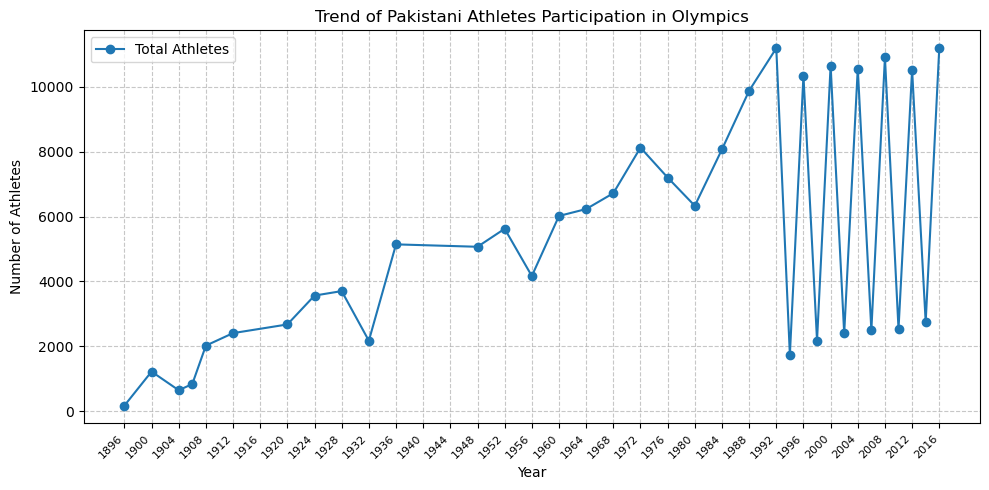

In [73]:
import matplotlib.pyplot as plt


participation_trend = df.groupby('Year')['ID'].nunique()

plt.figure(figsize=(10, 5))
plt.plot(participation_trend.index, participation_trend.values, marker='o', linestyle='-', label='Total Athletes')
plt.title('Trend of Pakistani Athletes Participation in Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(range(1896, 2020, 4), rotation=45, ha='right', fontsize=8)  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()

plt.legend()

plt.show()


What is the average weight of a Pakistani athlete competing in the Olympics?

In [74]:
filter_country_Pak = df.query('NOC == "PAK"')
pak_weights_bysports = filter_country_Pak.groupby('Sport')['Weight']
pak_averageweight_olympics=pak_weights_bysports.mean().sort_values(ascending=False)
pak_averageweight_olympics

Sport
Judo             100.000000
Shooting          74.722222
Sailing           74.500000
Cycling           71.900000
Athletics         71.283784
Swimming          70.125000
Rowing            70.000000
Wrestling         69.960000
Hockey            68.820652
Weightlifting     68.750000
Boxing            68.290323
Table Tennis      65.000000
Alpine Skiing     59.500000
Name: Weight, dtype: float64

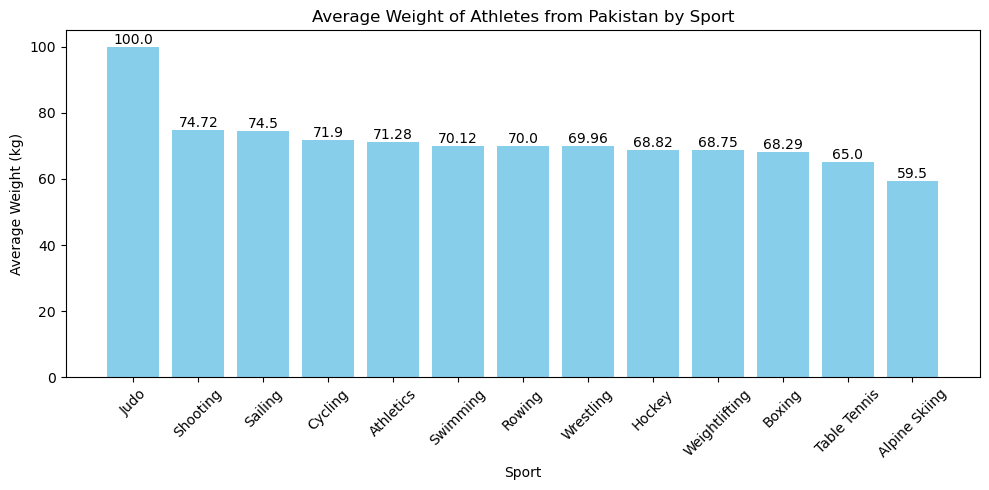

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(pak_averageweight_olympics.index, pak_averageweight_olympics.values, color='skyblue')

plt.title('Average Weight of Athletes from Pakistan by Sport')
plt.xlabel('Sport')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45) 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()


#### CHALLENGE QUESTIONS

(PLEASE COMPLETE ALL SEGMENTS ABOVE FIRST THEN ATTEMPT THESE)

These Questions enable you to become Pro in Pandas and be different from others!

You can take Help of Google, Stackoverflow, Any Blog or Even ChatGPT to solve them, Remember this is challenging but once you complete you will accomplish "How to Navigate the Unknown and Implement a Solution" this is an important Meta Skill. Just don't worry, be confident and attemp it.

##### 1. Matching with List of Values

We often require to search for a List of Values to filter our Dataset in Pandas

Learn from here
https://stackoverflow.com/questions/53082014/filter-dataframe-matching-column-values-with-list-values-in-python

##### For Country names you got in Answer from Question \# 2, Find the Top 5 Athlete within Group of those Countries, For example lets suppose you got answer India, china, Afghanistan, Pakistan.. So we will use these countries in this query to implement list criteria on Country and filter Top 5 Athletes.

Hence the Question is from Countries in Question 2 what are the Top 5 Athletes

In [76]:
top_countries = ['USA', 'URS', 'GER', 'GBR', 'ITA']
top_athletes_by_country = (
    df[df['NOC'].isin(top_countries)] 
    .groupby(['NOC', 'Name'])
    .agg(Count=('ID', 'nunique'))
    .reset_index()
    .sort_values(by='Count', ascending=False)
    .reset_index(drop=True)
)

print(top_athletes_by_country.head(5))

   NOC              Name  Count
0  ITA     Bruno Bianchi      3
1  GER     Karl Hoffmann      3
2  GER     Johann Schulz      2
3  URS  Nikolay Karasyov      2
4  GER    Martin Schmidt      2


##### 2. Getting Data within Range of Values

We often require to search for Data between Range of Values to filter our Dataset in Pandas

Learn from here
https://www.tutorialspoint.com/how-does-the-pandas-series-between-method-work#:~:text=The%20between()%20method%20in,value%20passed%20to%20the%20method

##### For Age Between 18 - 30 , Find the Top 5 Athlete by Number of Gold Medals Won.

In [77]:
Age_between18to30 = df[df['Age'].between(18, 30)]

goldmedalist_age18to30 = Age_between18to30.query("Medal == 'Gold'")

topGoldMedalistAge18to30 = (
    goldmedalist_age18to30.groupby(['ID', 'Name'])
    .agg({'Medal': 'count'})  
    .reset_index()
)

topGoldMedalistAge18to30 = topGoldMedalistAge18to30.sort_values(by='Medal', ascending=False)

topGoldMedalistAge18to30 = topGoldMedalistAge18to30.head(5)

print(topGoldMedalistAge18to30)


          ID                                Name  Medal
5863   94406             Michael Fred Phelps, II     18
5482   87390                Paavo Johannes Nurmi      9
4181   67046  Larysa Semenivna Latynina (Diriy-)      9
7121  113912                   Mark Andrew Spitz      9
3575   57998                          Sawao Kato      8


##### 3. Merging Data from Two Tables

Oftenly it occurs, we have two CSVs one with the All the Data and the Other with Reference Data to Lookup, In our data we have Athletes with Short Country name, can you Show Country Names by Merging both CSVs and showing Country Names in Full instead of Acronyms

Use: NOC_Regions.csv , Load it in Another data frame and Complete the task

How to Merge two Tables in Pandas https://colab.research.google.com/github/amoreira2/Lectures/blob/main/chapters/pandas/merge.ipynb

Or you can watch this helper Video : https://youtu.be/AHS925L8JVk

##### Answer Question \# 5 by Country Name! You answer will match exactly with Question 5 but this time Country Names will be Displayed

In [78]:
noc_regions_df = pd.read_csv('NOC_Regions.csv')
merged_df = pd.merge(df, noc_regions_df, how='left', left_on='NOC', right_on='NOC')



In [79]:
print(merged_df.columns)

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region',
       'notes'],
      dtype='object')


In [80]:
merged_df['Height'] = pd.to_numeric(merged_df['Height'], errors='coerce')

latest_olympic_year = merged_df.query('Year == Year.max()')

mean_height_each_region = latest_olympic_year.groupby('region')['Height'].mean()

top5_tallest_athlete = mean_height_each_region.sort_values(ascending=False).head(5)

print(top5_tallest_athlete)

region
Croatia               185.956989
Syria                 185.333333
Virgin Islands, US    185.000000
Qatar                 184.142857
Lithuania             184.137500
Name: Height, dtype: float64
